In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
img = imageio.imread('fluid-colors.png')

In [3]:
img.shape

(1075, 1403, 4)

In [4]:
img = img[:, :, :3]

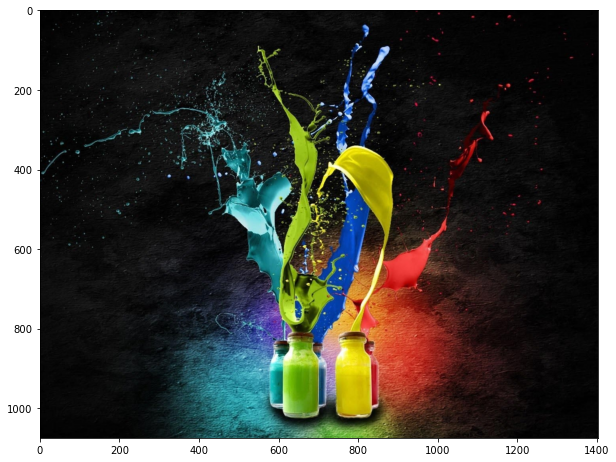

In [5]:
plt.figure(figsize=(10, 8))
plt.imshow(img);

In [6]:
def make_gray_img(img):
    img_gray = img.mean(axis=2)
    return img_gray

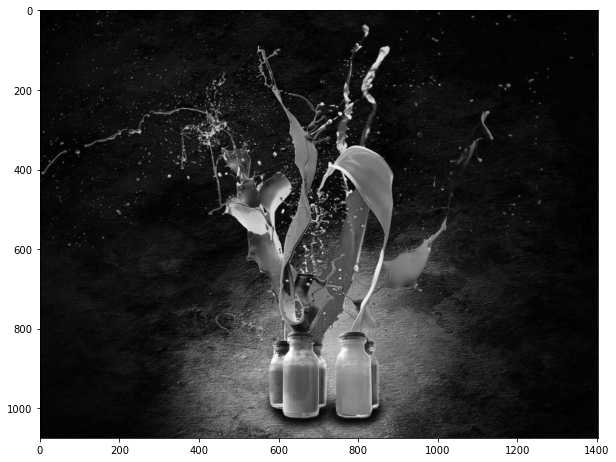

In [7]:
gray_img = make_gray_img(img)

plt.figure(figsize=(10, 8))
plt.imshow(gray_img, cmap='gray');

In [8]:
np.seterr(divide='ignore', invalid='ignore');

def rgb2hsv(img_rgb):
    # перевод из RGB в HSV    
    img_rgb = img_rgb.astype(np.float32) / 255.
    
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]
    
    V = np.max(img_rgb, axis=2)
    temp = np.min(img_rgb, axis=2)
    
    S = np.where(V == 0, 0., 1 - temp/V)
    
    H = np.zeros_like(V)

    Cr = 60 * ((G - B) / (V - temp) % 6)
    Cg = 60 * ((B - R) / (V - temp) + 2)
    Cb = 60 * ((R - G) / (V - temp) + 4)
    
    rv = np.where((R == V) & ((V - temp) != 0))
    gv = np.where((G == V) & ((V - temp) != 0))
    bv = np.where((B == V) & ((V - temp) != 0))
    
    H[rv] = Cr[rv]
    H[gv] = Cg[gv]
    H[bv] = Cb[bv]
    
    return np.dstack([H, S, V])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


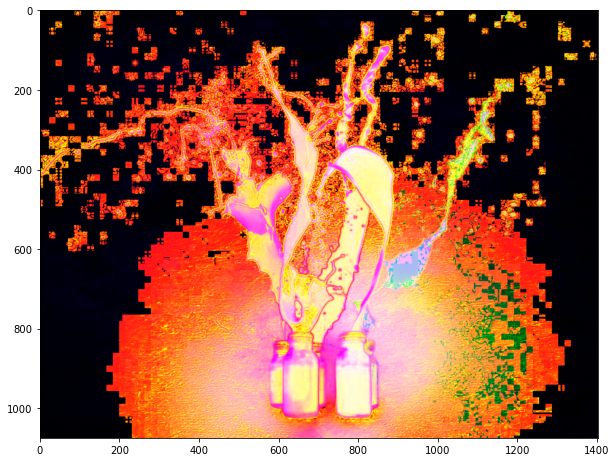

In [9]:
img_hsv = rgb2hsv(img)

plt.figure(figsize=(10, 8))
plt.imshow(img_hsv);

In [10]:
def sharp_filtering(img, size=(3, 3)):
    # Фильтр улучшения четкости
    def sharp_filter(size):
        sharp_filter = np.ones(size) * (-1)

        i_size = sharp_filter.shape[0] // 2
        j_size = sharp_filter.shape[1] // 2

        if sharp_filter.shape[0] / 2 == i_size:
            i = (i_size - 1, i_size + 1)
        else:
            i = (i_size, i_size + 1) 

        if sharp_filter.shape[1] / 2 == j_size:
            j = (j_size - 1, j_size + 1)
        else:
            j = (j_size, j_size + 1)

        sharp_filter[i[0]:i[1], j[0]:j[1]] = 9

        return sharp_filter
    
    _filter = sharp_filter(size)
    
    out_img = np.zeros((img.shape[0] - size[0] + 1,
                        img.shape[1] - size[1] + 1, 
                        img.shape[2]),
                       dtype=np.float32)

    for c in range(img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i + size[0], j:j + size[1], c]
                out_img[i, j, c] = np.sum(x * _filter) * 1/size[0] * 1/size[1]
    
    return out_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


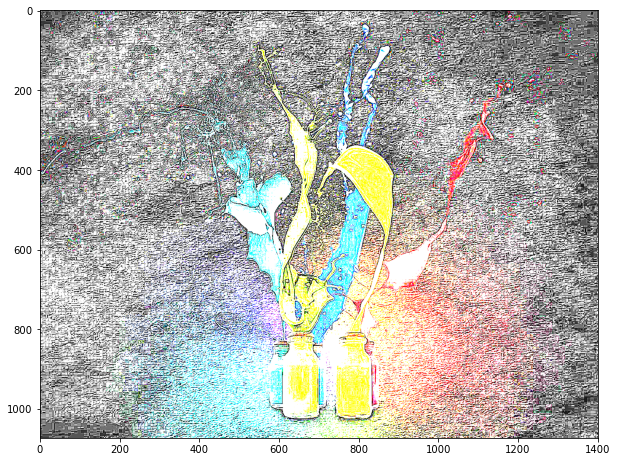

In [11]:
filtered_img = sharp_filtering(img)

plt.figure(figsize=(10, 8))
plt.imshow(filtered_img);